<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/hyper_para_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyper parameter optimization
This file describes how to do hyper parameter optimization of machine learningand deep learning algorithms using
`HyperOpt` module of `AI4Water` package. In this file, random search, grid search Bayesian methods are implemented.

In [1]:
# install AI4Water package if it is not available already
try:
    from ai4water import Model
except (ModuleNotFoundError, ImportError):
    !python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git@dev"

In [2]:
from ai4water import Model
from ai4water.hyper_opt import HyperOpt
from ai4water.datasets import arg_beach

from ai4water.hyper_opt import Real, Categorical, Integer
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should ins

Read the data file. Our data contains 1446 rows nad 24 columns.

In [3]:
data = arg_beach()
data.shape

(1446, 14)

In [4]:
data.head()

,tide_cm,wat_temp_c,sal_psu,air_temp_c,pcp_mm,pcp3_mm,pcp6_mm,pcp12_mm,wind_dir_deg,wind_speed_mps,air_p_hpa,mslp_hpa,rel_hum,tetx_coppml
index,,,,,,,,,,,,,,
2018-06-19 00:00:00,36.407149,19.321232,33.956059,19.780000,0.0,0.0,0.0,0.0,159.533333,0.960000,1002.856667,1007.256667,95.000000,NaN
2018-06-19 00:30:00,35.562515,19.320124,33.950508,19.093333,0.0,0.0,0.0,0.0,86.596667,0.163333,1002.300000,1006.700000,95.000000,NaN
2018-06-19 01:00:00,34.808016,19.319666,33.942532,18.733333,0.0,0.0,0.0,0.0,2.260000,0.080000,1001.973333,1006.373333,95.000000,NaN
2018-06-19 01:30:00,30.645216,19.320406,33.931263,18.760000,0.0,0.0,0.0,0.0,62.710000,0.193333,1001.776667,1006.120000,95.006667,NaN
2018-06-19 02:00:00,26.608980,19.326729,33.917961,18.633333,0.0,0.0,0.0,0.0,63.446667,0.510000,1001.743333,1006.103333,95.006667,NaN


Define which columns in the data are to be used as inputs and which columns are to be used as outputs. 


In [5]:
inputs = list(data.columns)[0:-1]
outputs = [list(data.columns)[-1]]

Let's first use [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) model with some random parameters which go in `ml_model_args`.

In [6]:
ai4water_args = {"input_features": inputs,
               "output_features": outputs,
               "val_data": "same",
               "model": {"xgboostregressor": {}}, 
               "test_fraction": 0.3}

These and other hyper parameters are used to initiate the `Model`.

# Grid Search
Define the parameter space.

In [7]:
dims = {'n_estimators': [1000, 1200, 1400, 1600, 1800,  2000],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001,  0.0005],
        'booster': ["gbtree", "dart"]}        

In [8]:
opt = HyperOpt("grid",
               param_space=dims,
               ai4water_args=ai4water_args,
               data=data,
               )

total number of iterations: 288
[01:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224085682125742.56
[01:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224085682125742.56
[01:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224085682125742.56
[01:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224085682125742.56
[01:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224085682125742.56
[01:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224085682125742.56
[0

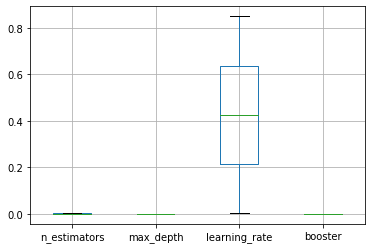

In [9]:
sr = opt.fit()

In [10]:
opt.best_paras()

{'booster': 'dart',
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 1000}

building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)
[01:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 197876033723598.2


197876033723598.2

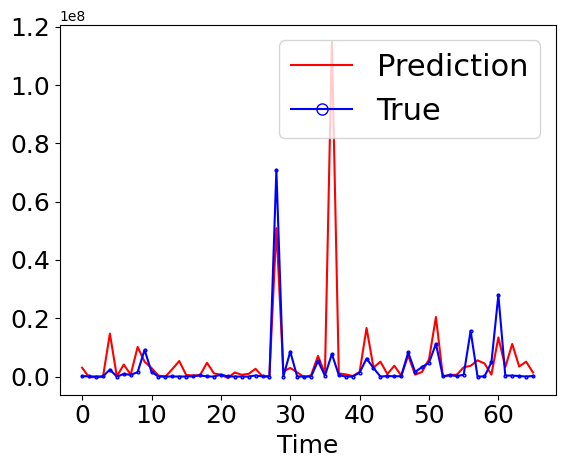

In [11]:
opt.predict(**opt.best_paras())

# Random Search

Now we will use `random search` algorithm for hyper parameter optimization. The most important parameter is `n_iter` 
which determines how many iterations we are going to use. 

total number of iterations: 100
[01:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 204254179743837.8
[01:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 205615333346731.47
[01:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 207026486148457.12
[01:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 200323830808320.62
[01:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 226535114976005.84
[01:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 208822422524623.56
[01

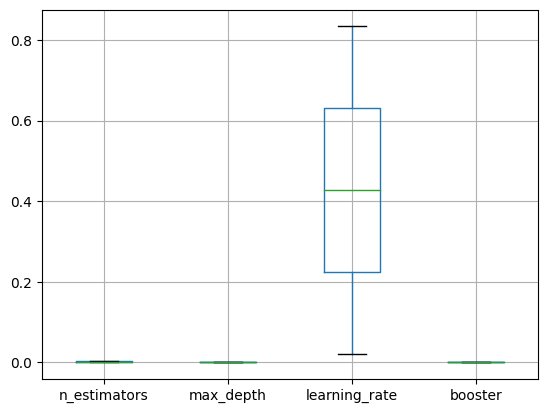

In [12]:
opt = HyperOpt("random",
               param_space=dims,
               ai4water_args=ai4water_args,
               data=data,
               n_iter=100
               )
sr = opt.fit()

In [13]:
#Find the best parameters
opt.best_paras()

{'booster': 'dart',
 'learning_rate': 0.005,
 'max_depth': 4,
 'n_estimators': 1800}

building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)
[01:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 198315613831502.25


198315613831502.25

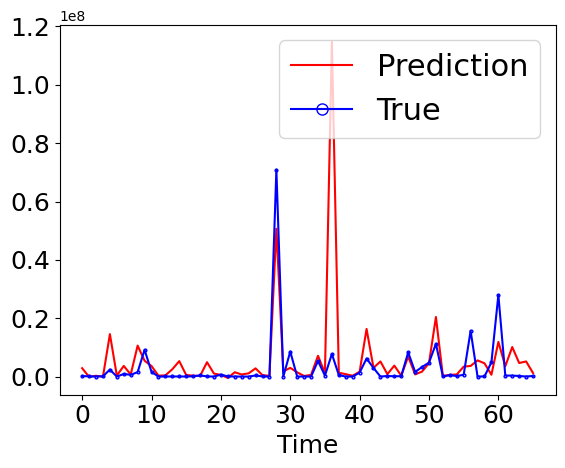

In [14]:
# make prediction using best parameters.
opt.predict(**opt.best_paras())

# Bayesian
Now we optimize the same parameters with `Bayesian` optimization. Under the hood, we use [`gp_minimize`](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#skopt.gp_minimize) function of [`skopt`](https://scikit-optimize.github.io/stable/index.html).

We first need to define the parameter space. But since we are going to use skopt, we need to define the parameter space 
using space classes available from skopt. The parameter space can be [`Integer`](https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.Integer.html#skopt.space.space.Integer), [`Real`](https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.Real.html#skopt.space.space.Real) or [`Categorical`](https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.Categorical.html#skopt.space.space.Categorical) depending upon the parameter.

In [15]:
dims = [Integer(low=1000, high=2000, name='n_estimators'),
        Integer(low=3, high=6, name='max_depth'),
        Real(low=1e-5, high=0.1, name='learning_rate'),
        Categorical(categories=["gbtree", "dart"], name="booster")
        ]

We need to initiate the `HyperOpt` class same as above. All the additional parameters which we want to pass `gp_minimize`
can be passed to `HyperOpt` class. Finally we use `fit` method to start optimization. 

[01:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 223365545248732.75
[01:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209207524543274.25
[01:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 227795359167363.1
[01:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 206731415465148.03
[01:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 199923544602788.25
[01:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 214117953523963.03


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[01:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 199923544602788.25
[01:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 199714618664326.6
[01:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 202793183992067.12
[01:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209787680109102.25
[01:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 204334156557214.2
[01:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209429873275685.16
[01:31:46] WARNING: /workspace/src/o

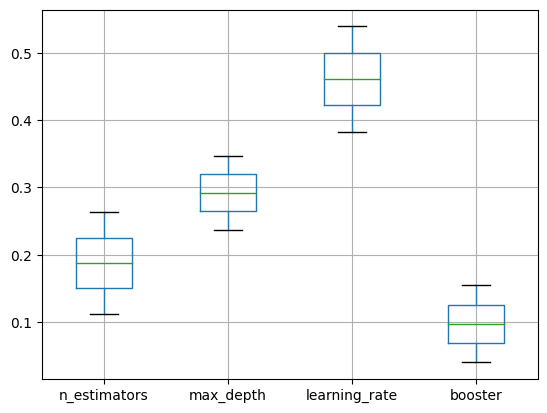

In [16]:
opt = HyperOpt("bayes",
               param_space=dims,
               ai4water_args=ai4water_args,
               data=data,
               n_calls=100,
               x0=[1000, 3, 0.01, "gbtree"],
               n_random_starts=3,  # the number of random initialization points
               random_state=2
               
               )
sr = opt.fit()

# Bayesian with LSTM model

Now we build and [`LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) based model and optimize its parameters with Bayesian optimization method. The `layers` dictionary is used to define the structure of the neural network. 

In [17]:
layers = {
    "LSTM": {"config": {"units": 64}},
    "Dense": {"config": {"units": 1, "activation": "relu"}},
    "Reshape": {"config": {"target_shape": (1,1)}}
}

dl4seq_args = {"input_features": inputs,
               "output_features": outputs,
               "lookback": 4,
               "val_data": "same",
               "test_fraction": 0.3,
               "model": {'layers': layers},
               'train_data':'random',
               "epochs": 500
               }
# make model args

#initiate the mdoel
model = Model(data=data, verbosity=0, **dl4seq_args)

train the model while randomly splitting train and test data.

In [18]:
history = model.fit()

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:1237: UserWarning:

Setting val_fraction from 0.2 to 0.0

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



In [19]:
# The minimum validation loss acheived during training
np.min(history.history['val_loss'])

0.001263727666810155

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



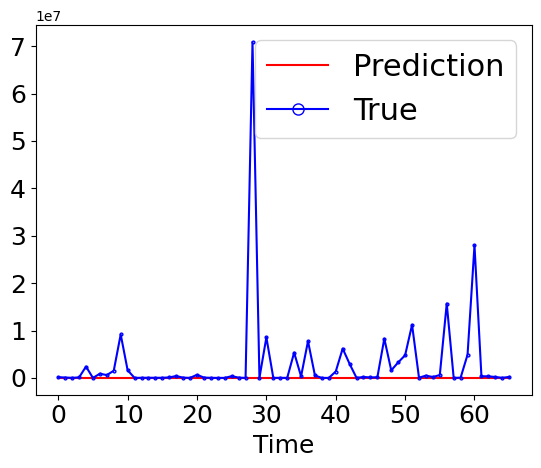

In [20]:
# Perfomance on validation data
t,p = model.predict(indices=model.test_indices)

Now in order to optimize the parameters define parameter space for the parameters to be optimized

In [25]:
from ai4water.hyper_opt import Real, Categorical, Integer

dims = [Categorical([32, 64, 128, 256], name='lstm_units'),
        Integer(low=3, high=12, name='lookback'),
        Real(low=1e-5, high=0.01, name='learning_rate'),
        Categorical(categories=[8, 12, 16, 24, 32], name="batch_size"),
        Categorical(categories=["relu", "elu", "leakyrelu"], name="dense_actfn")
        ]

Define objective function. The parameters to be optimized (which have been declared above) will be in kwargs. We can use them in our objective function as we like.

In [26]:
def objective_fn(return_model=False,
                 title="bayes", # This will make sure that all optimization results will be stored in a single folder
                 **kwargs):

    layers = {
        "LSTM": {"config": {"units": int(kwargs["lstm_units"])}},
        "Dense": {"config": {"units": 1, "activation": kwargs["dense_actfn"]}},
        "Reshape": {"config": {"target_shape": (1,1)}}
    }

    model = Model(
                data=data,
                prefix=title,
                verbosity=0,
                input_features=inputs,
                output_features=outputs,
                lookback=int(kwargs["lookback"]),
                val_data="same",
                val_fraction=0.0,
                test_fraction=0.3,
                model={'layers':layers},
                batch_size=int(kwargs["batch_size"]),
                lr=float(kwargs["learning_rate"]),
                train_data='random',
                epochs=500
                  )

    history = model.fit()

    mse = np.min(history.history['val_loss'])
    print(f"Validation mse {mse}")

    if return_model:
        return model
    return mse

Initiatialize optimization problem. Since we are using the external function/model and not `AI4Water`, we need to provide 
the objective function/model/function as keyword argument `model`. The remaming parameters are same as above and they 
which will be passed to [`gp_minimize`](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#skopt.gp_minimize).

In [27]:
opt = HyperOpt("bayes",
               objective_fn=objective_fn,
               param_space=dims,
               acq_func='EI',  # Expected Improvement.
               n_calls=50,     #number of iterations
               # acq_optimizer='auto',
               x0=[32, 5, 0.001, 8, "relu"],  # inital value of optimizing parameters
               n_random_starts=3,  # the number of random initialization points
               random_state=2
               )

Start optimization

In [28]:
opt_results = opt.fit()

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 5, due to which first 5 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 5, due to which first 5 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0005532537470571697


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001333659514784813


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011187787167727947


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009152145939879119


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001146889990195632


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0015670175198465586


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010133569594472647


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011640996672213078


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011826105182990432


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011584385065361857


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011609848588705063


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009964831406250596


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010140358936041594


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0015309209702536464


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008996409014798701


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0014594384701922536


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010969400173053145


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011001331731677055


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009209377458319068


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011247571092098951


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011564616579562426


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011268137022852898


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009369333274662495


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010636522201821208


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010308381170034409


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001475738943554461


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011006061686202884


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001033807173371315


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0007064627134241164


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010325382463634014
could not pickle results


The optimized value of objective function will be the lowest mse achieved during model's iterations.

In [29]:
opt.gpmin_results['fun']

0.0005532537470571697

And the parameters which produced this (best) value are

In [30]:
opt.best_paras()

{'batch_size': 16,
 'dense_actfn': 'leakyrelu',
 'learning_rate': 0.009477828809163502,
 'lookback': 11,
 'lstm_units': 64}

Now we can train the LSTM model with the best parameters

In [31]:
model = objective_fn(return_model=True, title=None,
                    lstm_units=128, lookback=12, learning_rate=0.00391297699511148, batch_size=24, dense_actfn="elu")

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0013118819333612919


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



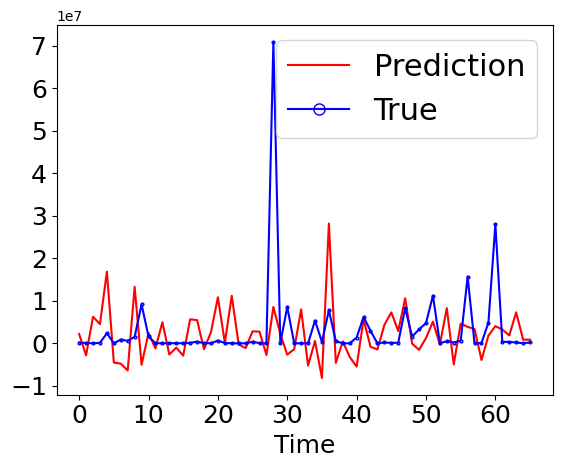

In [32]:
# Perfomance on validation data
t,p_test = model.predict(indices=model.test_indices)

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:516: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



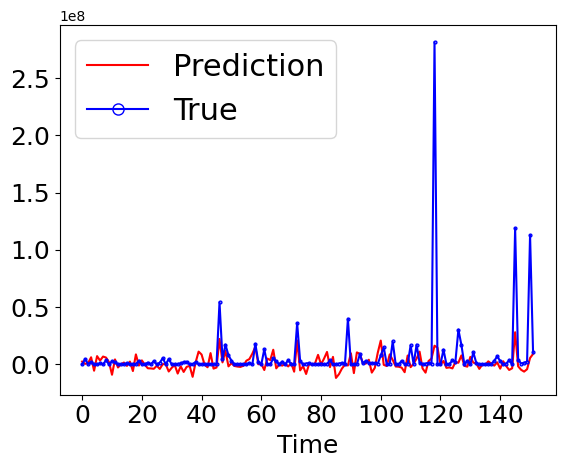

In [33]:
# Performance of the model on training data
t,p = model.predict(indices=model.train_indices, prefix='train')

currently we are ignoring examples where the corresponding labels are NaNs. We can check this.

In [34]:
model.config['allow_nan_labels']

0

The above argument means that for an example/sample if nans are found in its target/label, then don't ignore nan, 
rather skip that example. This is the reason, our trainig data was of about 155 examples and test/validation data
consisted of about 68 examples. 

At prediction time, we would however, like to check model's peformance on all the data irrespective of the fact whether 
labels are available or not. When labels are not available, we will not be able to caculate corresponding errors but the
model is able to make predictions on that data.

In [35]:
model.config['allow_nan_labels'] = 2
model.config['allow_nan_labels']

2


********** Allowing NANs in predictions **********



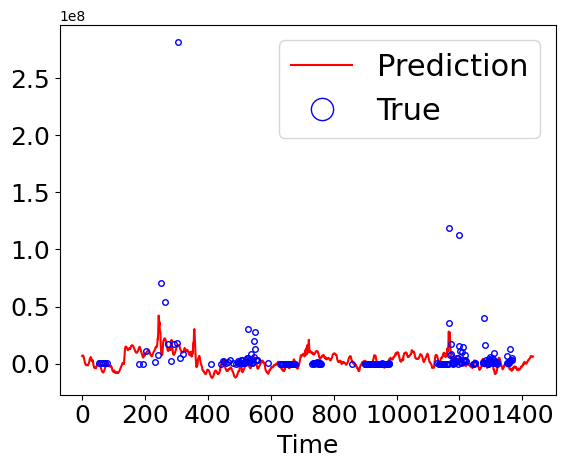

In [36]:
# Performance of the model on training data
t,p = model.predict(prefix='all')

In [37]:
# The results with the best model are  are saved in following folder.
model.path

'/content/results/20210519_021248'

# Optimizing multiple models
Because of simplified user interfaces of `AI4Water` and `HyperOpt`, we can now optimize hyper-parameters of multiple models/functions
with relatively few lines of code. For example if we want to optimize parameters of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and 
[SupportVectorRessor](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), we can do following.

Validation mse 5.959586064163118e+16
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0
Validation mse 3251972220425751.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972220429268.0
Validation mse 3251972192711590.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972190402057.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972188270338.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972186290848.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972184443290.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972182711290.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972181081098.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972179541489.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972178082956.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972176697333.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972175377677.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972174117983.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 3251972172913145.0
could not pickle results


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 3251972172913145.0

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (218, 13)
prev_y shape:  (218, 1)
target shape:  (218,)


/usr/local/lib/python3.7/dist-packages/AI4Water/utils/plotting_tools.py:401: UserWarning:

for poly kernels of SVR, feature importance can not be plotted.



building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 3251972172913145.0

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (218, 13)
prev_y shape:  (218, 1)
target shape:  (218,)


/usr/local/lib/python3.7/dist-packages/AI4Water/utils/plotting_tools.py:401: UserWarning:

for poly kernels of SVR, feature importance can not be plotted.




********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 127311464180613.36
Validation mse 121074438349795.5
Validation mse 124125748402719.86
Validation mse 121997491346663.2
Validation mse 124125748402719.86
Validation mse 121997491346663.2
Validation mse 124125748402719.86
Validation mse 121997491346663.2
Validation mse 124125748402719.86
Validation mse 121997491346663.2
Validation mse 124125748402719.86
Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 121997491346663.2
could not pickle results
building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 121074438349795.5

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (218, 13)
prev_y shape:  (218, 1)
target shape:  (218,)
building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 13)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 13)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 121074438349795.5

*******

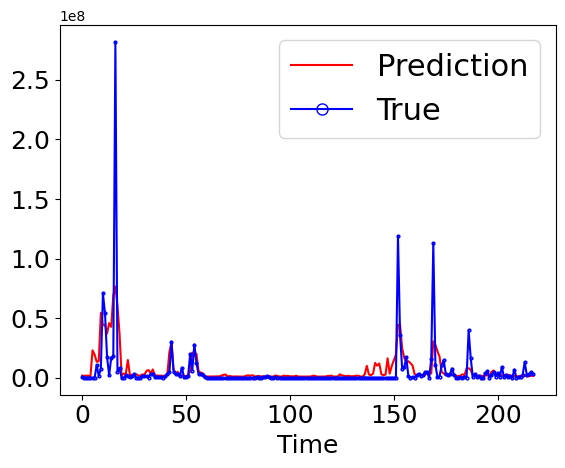

In [38]:
dims = {"SVR": {"dims":
               [Categorical(categories=[0.1, 0.2, 0.3, 0.4, 0.5], name='epsilon'),
                Integer(low=3, high=6, name='degree'),
                Real(low=1.0, high=2.0, name='C'),
                Categorical(categories=["linear", "poly", "rbf", "sigmoid"], name="kernel")],
                "x0": [0.2, 3, 1.5, "sigmoid"]},

        "RandomForestRegressor":
        {"dims":
         [Categorical(categories=[100, 300, 500, 700, 900, 1100], name="n_estimators"),
          Integer(low=3, high=6, name='max_depth'),
          Integer(low=2, high=5, name='min_samples_split'),
          Integer(low=1, high=4, name='min_samples_leaf')],
         "x0": [300, 4, 3, 3]}
     }

# container for saving the results.
results = {}

for model, paras in dims.items():

    opt = HyperOpt("bayes",
                   param_space=paras['dims'],
                   ai4water_args= {"input_features": inputs,
                                 "output_features": outputs,
                                 "val_data": "same",
                                 "model": {model: {}},
                                 "test_fraction": 0.3},
                   data=data,
                   eval_on_best=True,
                   n_calls=25, 
                   x0=paras["x0"]
                   )

    sr = opt.fit()
    _model = opt.eval_with_best(return_model=True)
    results[model] = _model.predict(indices=_model.test_indices, pp=False)
    

By adding more models in `dims` dictionary above, we optimize parameters of more models.

We can compare the performance of two models using [Taylor's diagram](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2000JD900719).

In [39]:
from ai4water.utils.taylor_diagram import taylor_plot

trues = {'Test': results["RandomForestRegressor"][0]}

simulations = {"Test": {
    "SVR": results["SVR"][1],
    "RandomForestRegressor": results["RandomForestRegressor"][1],
}}

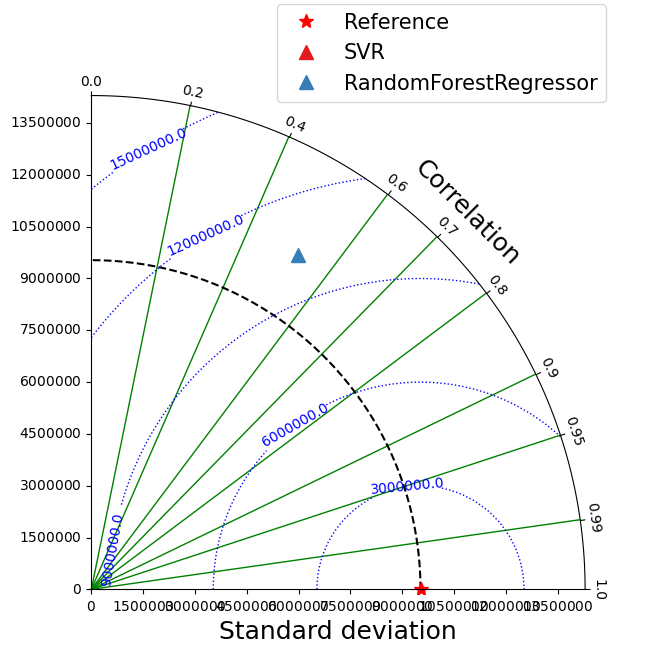

In [40]:
taylor_plot(trues=trues,
            simulations=simulations,
            add_grid=True,
            plot_bias=True,
            figsize=(8,6),
            cont_kws={'colors': 'blue', 'linewidths': 1.0, 'linestyles': 'dotted'},
            grid_kws={'axis': 'x', 'color': 'g', 'lw': 1.0},
            leg_kws={'numpoints': 1, 'fontsize': 15, 'markerscale': 1, 'bbox_to_anchor':(0.77, 1.1)}
           )